In [3]:
library(XML)
library(RSQLite)
library(stringr)
library(ggplot2)
library(dplyr)

In [22]:
year <- 2013
url <- paste("http://sports.yahoo.com/nfl/stats/byteam?group=Offense&cat=Total&conference=NFL&year=season_",
             year,"&sort=530&old_category=Total&old_group=Offense")
offense <- readHTMLTable(url, encoding = "UTF-8", stringsAsFactors = FALSE, trim = TRUE, which=7)
colnames(offense) <- str_trim(colnames(offense))
offense <- offense[,-c(2,4,6,8,10,12,14,16,18,20,22,24,26,28)]
offense[,2:13] <- apply(offense[,2:13],2,str_trim)
offense[,2:13] <- apply(offense[,2:13],2,as.numeric)
offense$TOP = str_trim(offense$TOP)
offense[,14] <- as.numeric(substr(offense[,14], 1, 2))*60 + as.numeric(substr(offense[,14], 4, 6))

In [15]:
glimpse(offense)

Observations: 32
Variables: 14
$ Team      (chr) "Denver Broncos", "Chicago Bears", "New England Patriots"...
$ G         (dbl) 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...
$ Pts/G     (dbl) 37.9, 27.8, 27.8, 27.6, 27.4, 26.9, 26.9, 26.1, 26.1, 25....
$ Yds/G     (dbl) 457.3, 381.8, 384.5, 417.3, 341.1, 337.3, 368.2, 339.0, 4...
$ PassYds/G (dbl) 340.3, 267.6, 255.4, 256.9, 247.1, 208.8, 258.5, 202.3, 2...
$ RushYds/G (dbl) 117.1, 114.3, 129.1, 160.4, 94.0, 128.5, 109.7, 136.8, 13...
$ 1stD/G    (dbl) 27.2, 21.5, 23.6, 22.2, 20.3, 20.2, 20.6, 19.2, 21.9, 22....
$ 3rdM      (dbl) 95, 83, 83, 83, 63, 74, 92, 76, 89, 97, 77, 101, 95, 78, ...
$ 3rdD%     (dbl) 46.3, 42.1, 37.6, 39.0, 35.0, 34.7, 40.9, 37.3, 41.2, 43....
$ 4thM      (dbl) 8, 8, 7, 7, 4, 4, 12, 6, 9, 9, 7, 5, 5, 10, 3, 5, 9, 10, ...
$ 4thD%     (dbl) 88.9, 61.5, 46.7, 50.0, 66.7, 36.4, 57.1, 54.5, 69.2, 47....
$ Pen       (dbl) 117, 85, 69, 95, 102, 101, 102, 128, 86, 95, 103, 95, 110...
$ PYds      (dbl) 100

In [16]:
head(offense)

,Team,G,Pts/G,Yds/G,PassYds/G,RushYds/G,1stD/G,3rdM,3rdD%,4thM,4thD%,Pen,PYds,TOP
1,Denver Broncos,16,37.9,457.3,340.3,117.1,27.2,95,46.3,8,88.9,117,1000,1831
2,Chicago Bears,16,27.8,381.8,267.6,114.3,21.5,83,42.1,8,61.5,85,708,1862
3,New England Patriots,16,27.8,384.5,255.4,129.1,23.6,83,37.6,7,46.7,69,625,1820
4,Philadelphia Eagles,16,27.6,417.3,256.9,160.4,22.2,83,39,7,50,95,846,1584
5,Dallas Cowboys,16,27.4,341.1,247.1,94,20.3,63,35,4,66.7,102,867,1741
6,Kansas City Chiefs,16,26.9,337.3,208.8,128.5,20.2,74,34.7,4,36.4,101,774,1865


In [17]:
print(head(offense))

                  Team  G Pts/G Yds/G PassYds/G RushYds/G 1stD/G 3rdM 3rdD%
1       Denver Broncos 16  37.9 457.3     340.3     117.1   27.2   95  46.3
2        Chicago Bears 16  27.8 381.8     267.6     114.3   21.5   83  42.1
3 New England Patriots 16  27.8 384.5     255.4     129.1   23.6   83  37.6
4  Philadelphia Eagles 16  27.6 417.3     256.9     160.4   22.2   83  39.0
5       Dallas Cowboys 16  27.4 341.1     247.1      94.0   20.3   63  35.0
6   Kansas City Chiefs 16  26.9 337.3     208.8     128.5   20.2   74  34.7
  4thM 4thD% Pen PYds  TOP
1    8  88.9 117 1000 1831
2    8  61.5  85  708 1862
3    7  46.7  69  625 1820
4    7  50.0  95  846 1584
5    4  66.7 102  867 1741
6    4  36.4 101  774 1865


----
Defense data

In [23]:
url <- paste("http://sports.yahoo.com/nfl/stats/byteam?group=Defense&cat=Total&conference=NFL&year=season_",
             year,"&sort=530&old_category=Total&old_group=Defense"); url

[1] "http://sports.yahoo.com/nfl/stats/byteam?group=Defense&cat=Total&conference=NFL&year=season_ 2013 &sort=530&old_category=Total&old_group=Defense"

In [24]:
defense <- readHTMLTable(url, encoding = "UTF-8", stringsAsFactors = FALSE, trim = TRUE, which=7)
colnames(defense) <- str_trim(colnames(defense))
defense <- defense[,-c(2,4,6,8,10,12,14,16,18,20,22,24,26,28)]
defense[,2:13] <- apply(defense[,2:13],2,str_trim)
defense[,2:13] <- apply(defense[,2:13],2,as.numeric)
head(defense)

,Team,G,Pts/G,Yds/G,RushYds/G,PassYds/G,Int,IntTD,FFum,DefTD,Tack,PD,Sack
1,Arizona Cardinals,16,20.3,317.4,84.4,233,20,4,11,5,686,103,47
2,Pittsburgh Steelers,16,23.1,337.2,115.6,221.6,10,3,14,3,637,72,34
3,San Diego Chargers,16,21.8,366.5,107.8,258.7,11,1,9,1,678,70,35
4,Philadelphia Eagles,16,23.9,394,104.3,289.8,19,1,11,2,739,101,37
5,New York Jets,16,24.2,334.9,88.3,246.7,13,1,9,1,599,64,41
6,New Orleans Saints,16,19,305.7,111.6,194.1,12,0,10,0,564,69,49


In [26]:
str(defense)

'data.frame':	32 obs. of  13 variables:
 $ Team     : chr  "Arizona Cardinals" "Pittsburgh Steelers" "San Diego Chargers" "Philadelphia Eagles" ...
 $ G        : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Pts/G    : num  20.3 23.1 21.8 23.9 24.2 19 23.9 17 14.4 22 ...
 $ Yds/G    : num  317 337 366 394 335 ...
 $ RushYds/G: num  84.4 115.6 107.8 104.3 88.3 ...
 $ PassYds/G: num  233 222 259 290 247 ...
 $ Int      : num  20 10 11 19 13 12 17 18 28 16 ...
 $ IntTD    : num  4 3 1 1 1 0 2 2 3 1 ...
 $ FFum     : num  11 14 9 11 9 10 13 11 15 14 ...
 $ DefTD    : num  5 3 1 2 1 0 2 5 4 1 ...
 $ Tack     : num  686 637 678 739 599 564 742 681 575 585 ...
 $ PD       : num  103 72 70 101 64 69 83 87 90 101 ...
 $ Sack     : num  47 34 35 37 41 49 34 38 44 40 ...


In [28]:
head(offense, 3); head(defense, 3)

,Team,G,Pts/G,Yds/G,PassYds/G,RushYds/G,1stD/G,3rdM,3rdD%,4thM,4thD%,Pen,PYds,TOP
1,Denver Broncos,16,37.9,457.3,340.3,117.1,27.2,95,46.3,8,88.9,117,1000,1831
2,Chicago Bears,16,27.8,381.8,267.6,114.3,21.5,83,42.1,8,61.5,85,708,1862
3,New England Patriots,16,27.8,384.5,255.4,129.1,23.6,83,37.6,7,46.7,69,625,1820


,Team,G,Pts/G,Yds/G,RushYds/G,PassYds/G,Int,IntTD,FFum,DefTD,Tack,PD,Sack
1,Arizona Cardinals,16,20.3,317.4,84.4,233,20,4,11,5,686,103,47
2,Pittsburgh Steelers,16,23.1,337.2,115.6,221.6,10,3,14,3,637,72,34
3,San Diego Chargers,16,21.8,366.5,107.8,258.7,11,1,9,1,678,70,35


In [29]:
combined <- merge(offense, defense, by.x="Team", by.y="Team")

In [30]:
head(combined[,1:13], 3); head(combined[,14:25], 3)

,Team,G.x,Pts/G.x,Yds/G.x,PassYds/G.x,RushYds/G.x,1stD/G,3rdM,3rdD%,4thM,4thD%,Pen,PYds
1,Arizona Cardinals,16,23.7,346.4,250.1,96.3,20.6,74,35.2,5,55.6,97,744
2,Atlanta Falcons,16,22.1,343.1,265.2,77.9,20.6,89,43,6,42.9,91,788
3,Baltimore Ravens,16,20,307.4,224.4,83,18.4,92,36.4,6,37.5,112,942


,TOP,G.y,Pts/G.y,Yds/G.y,RushYds/G.y,PassYds/G.y,Int,IntTD,FFum,DefTD,Tack,PD
1,1859,16,20.3,317.4,84.4,233,20,4,11,5,686,103
2,1820,16,27.7,379.4,135.8,243.6,10,2,13,3,634,57
3,1820,16,22,335.5,105.4,230.1,16,1,14,1,585,101


In [31]:
colnames(combined)[2] <- "Games"
colnames(combined)[3] <- "OffPPG"
colnames(combined)[4] <- "OffYPG"
colnames(combined)[5] <- "OffPassYPG"
colnames(combined)[6] <- "OffRushYPG"
combined$G.y <- NULL
colnames(combined)[15] <- "DefPPG"
colnames(combined)[16] <- "DefYPG"
colnames(combined)[17] <- "DefRushYPG"
colnames(combined)[18] <- "DefPassYPG"

In [33]:
head(combined[,1:14], 3); head(combined[,15:25], 3)

,Team,Games,OffPPG,OffYPG,OffPassYPG,OffRushYPG,1stD/G,3rdM,3rdD%,4thM,4thD%,Pen,PYds,TOP
1,Arizona Cardinals,16,23.7,346.4,250.1,96.3,20.6,74,35.2,5,55.6,97,744,1859
2,Atlanta Falcons,16,22.1,343.1,265.2,77.9,20.6,89,43,6,42.9,91,788,1820
3,Baltimore Ravens,16,20,307.4,224.4,83,18.4,92,36.4,6,37.5,112,942,1820


,DefPPG,DefYPG,DefRushYPG,DefPassYPG,Int,IntTD,FFum,DefTD,Tack,PD,Sack
1,20.3,317.4,84.4,233,20,4,11,5,686,103,47
2,27.7,379.4,135.8,243.6,10,2,13,3,634,57,32
3,22,335.5,105.4,230.1,16,1,14,1,585,101,40


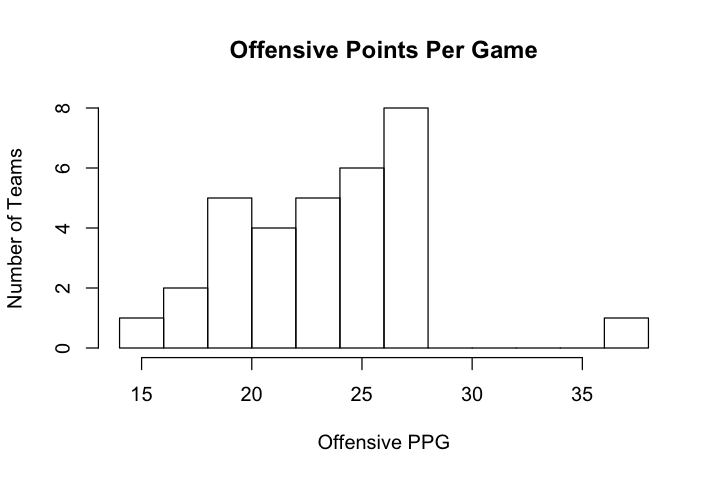

In [57]:
require(repr); options(repr.plot.width=6,repr.plot.height=4)
hist(combined$OffPPG, breaks=10,main="Offensive Points Per Game", 
     xlab="Offensive PPG",ylab="Number of Teams")

In [44]:
combined[,c('Team', 'OffPPG')] %>% head(5)

,Team,OffPPG
1,Arizona Cardinals,23.7
2,Atlanta Falcons,22.1
3,Baltimore Ravens,20
4,Buffalo Bills,21.2
5,Carolina Panthers,22.9


In [53]:
getOption("jupyter.plot_mimetypes")


[1] "image/png"

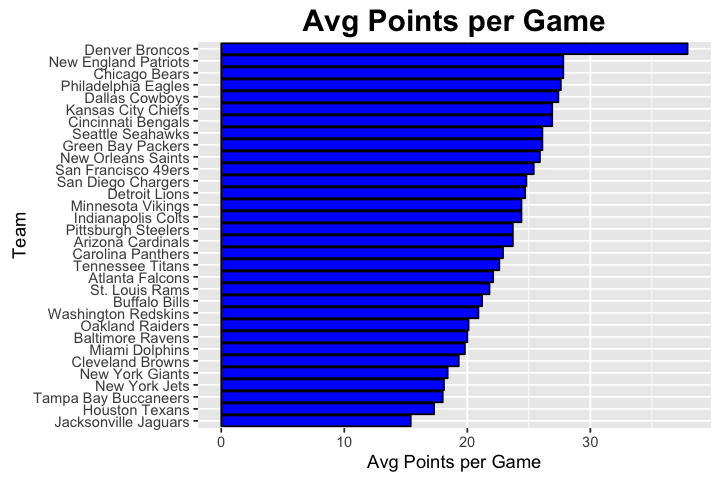

In [56]:
options(jupyter.plot_mimetypes="image/png")
options(repr.plot.width=6,repr.plot.height=4)
ppg <- transform(combined,Team=reorder(Team,combined$OffPPG))
ggplot(ppg,aes(x=Team, y=OffPPG)) +
  geom_bar(stat='identity',color="black",fill="blue") + coord_flip() + labs(x="Team",y="Avg Points per Game") + 
  ggtitle("Avg Points per Game") + theme(plot.title = element_text(size=18, face="bold"))

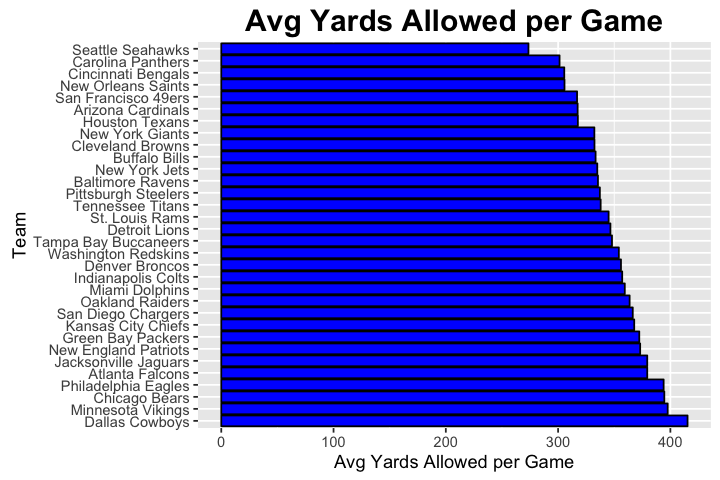

In [63]:
ypg = transform(combined, Team=reorder(Team, -combined$DefYPG))
ggplot(ypg, aes(x= Team, y = DefYPG)) + 
        geom_bar(stat='identity', color = 'black', fill = 'blue') + 
        coord_flip() +
        labs(x="Team", y="Avg Yards Allowed per Game") + 
        ggtitle("Avg Yards Allowed per Game") + 
        theme(plot.title=element_text(size=18, face="bold"))

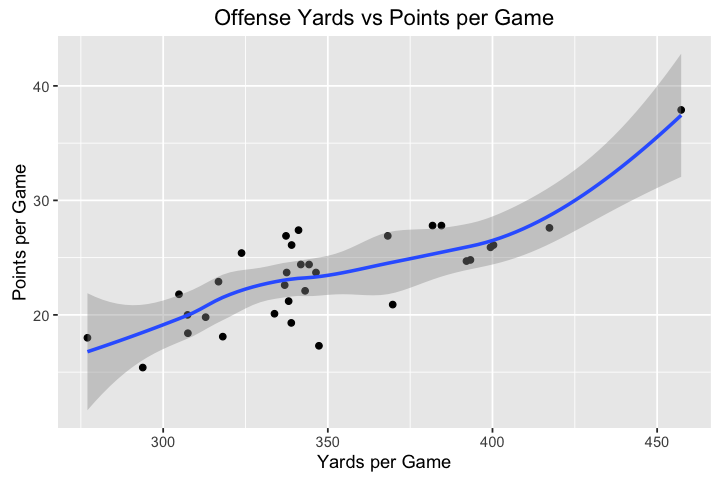

In [66]:
ggplot(combined, aes(x=combined$OffYPG, y=combined$OffPPG)) + 
    geom_point() + geom_smooth() + 
    labs(x="Yards per Game", y="Points per Game") + ggtitle("Offense Yards vs Points per Game")

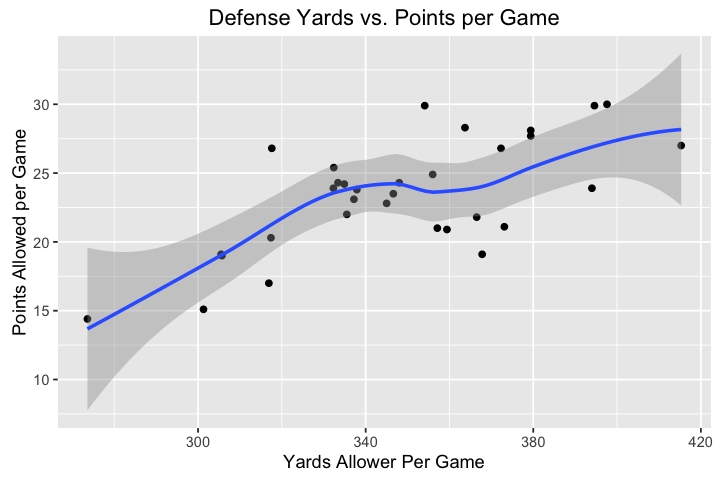

In [70]:
ggplot(combined, aes(x=combined$DefYPG, y=combined$DefPPG)) + 
    geom_point() + geom_smooth() + 
    labs(x="Yards Allower Per Game", y="Points Allowed per Game") +
    ggtitle("Defense Yards vs. Points per Game")


Longer a team is on offense, the more points per game they are likely to score. To test this we can scatter plot time of possession and offensive points per game. 

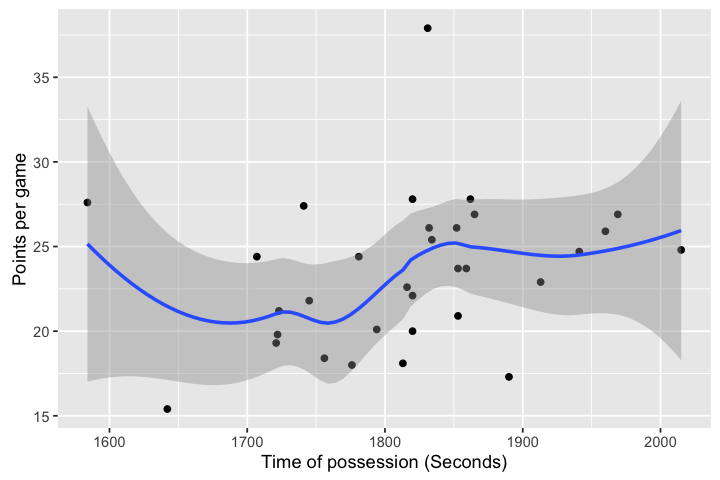

In [72]:
ggplot(combined, aes(x=combined$TOP, y=combined$OffPPG)) + 
    geom_point() + geom_smooth() + 
    labs(x="Time of possession (Seconds)", y="Points per game") 

The correlation between the two variables is not as strong as we might have guessed. Apparently there are team s at different levels of efficiency, some scoring lots of points in very little time

----
Indexes are descriptive statistics that combine imformation from miltiple data fields to give an observer a sense of what is going on without the observer needing to drill down into the components of the index. 

* Offense strength index will depend on teams' passing and rushing strenght. 
* Defense strength index will depend on the ability of the team to defend against the pass and the rush. 


This will allow us to compare the different aspects of each team's game to other team's and will let us arrive at a winner and a looser in out simulated games later on. 

Step- 1: Calcualte an offensive passing strenght score. 


Average passing Yeards per game `PassYds/G` 

In [76]:
head(offense, 3)

,Team,G,Pts/G,Yds/G,PassYds/G,RushYds/G,1stD/G,3rdM,3rdD%,4thM,4thD%,Pen,PYds,TOP,OPassStrength
1,Denver Broncos,16,37.9,457.3,340.3,117.1,27.2,95,46.3,8,88.9,117,1000,1831,0
2,Chicago Bears,16,27.8,381.8,267.6,114.3,21.5,83,42.1,8,61.5,85,708,1862,72.7
3,New England Patriots,16,27.8,384.5,255.4,129.1,23.6,83,37.6,7,46.7,69,625,1820,84.9


In [78]:
offense$OPassStrength = max(offense[, 5]) - offense[,5] 
offense$OPassStrength = (1 - (offense$OPassStrength/max(offense$OPassStrength))) * 100
head(offense, 3)

,Team,G,Pts/G,Yds/G,PassYds/G,RushYds/G,1stD/G,3rdM,3rdD%,4thM,4thD%,Pen,PYds,TOP,OPassStrength
1,Denver Broncos,16,37.9,457.3,340.3,117.1,27.2,95,46.3,8,88.9,117,1000,1831,100
2,Chicago Bears,16,27.8,381.8,267.6,114.3,21.5,83,42.1,8,61.5,85,708,1862,55.67073
3,New England Patriots,16,27.8,384.5,255.4,129.1,23.6,83,37.6,7,46.7,69,625,1820,48.23171
